In [2]:
import pandas as pd
import nibabel as nib
from Constants.directory_paths import fcp_root, ixi_root

## Import IXI dataset

Firstly, importing the IXI dataset and viewing different sheets in the excel file.

In [9]:
data = pd.ExcelFile(ixi_root + 'IXI.xls')

In [10]:
data.sheet_names

['Table',
 'Ethnicity',
 'Marital Status',
 'Occupation',
 'Qualification',
 'Study Date']

In [11]:
table = data.parse('Table')
ethnicity = data.parse('Ethnicity')
marital_status = data.parse('Marital Status')
occupation = data.parse('Occupation')
qualification = data.parse('Qualification')
study_date = data.parse('Study Date')

In [12]:
table.head(5)

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,1,1,170,80,2,3,5,2,1968-02-22,0,NaT,NaN
1,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.800137
2,12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.710472
4,14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.236824


In [6]:
import matplotlib.pylab as plt
import numpy as np
from scipy import ndimage

### Dataset Description

The MRI images are 3d images. There are 3 different axis along which the MRI scans can be viewed. These axis are depicted in the image below:
<br>
<img src="assets/images/reconstruction-planes.png" width=300 height=300>
<br>

We are interested in the axial, since it captures the maximum brain area.

### MRI imaging sequences

The most common MRI sequences are T1-weighted and T2-weighted scans. T1-weighted images are produced by using short TE and TR times. The contrast and brightness of the image are predominately determined by T1 properties of tissue. Conversely, T2-weighted images are produced by using longer TE and TR times. In these images, the contrast and brightness are predominately determined by the T2 properties of tissue.

In general, T1- and T2-weighted images can be easily differentiated by looking the CSF (Cereberal Spinal Fluid). CSF is dark on T1-weighted imaging and bright on T2-weighted imaging.



### T1 Images

Let's view one example of T1 image.

Shape of the MRI : (256, 256, 150)


Text(0.5,1,'Axial Plane')

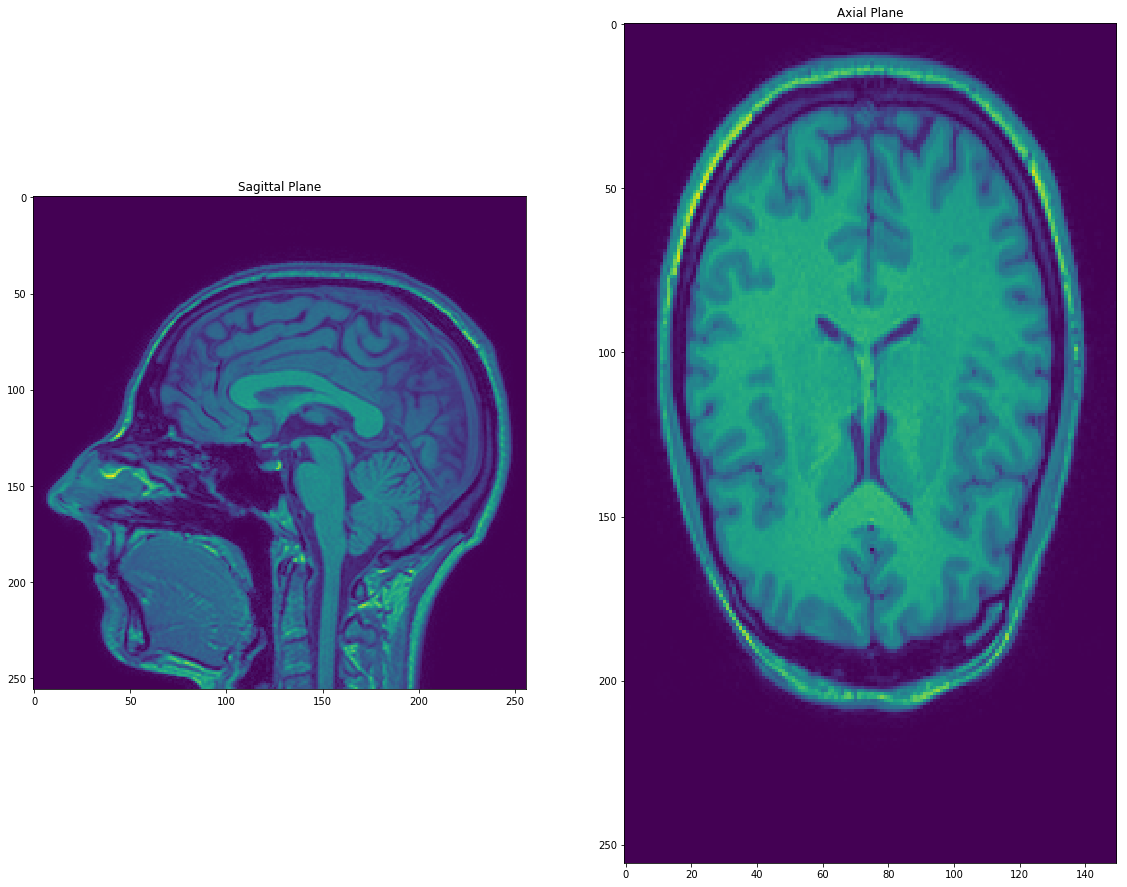

In [15]:
image = nib.load(ixi_root + 'IXI-T1-0/IXI002-Guys-0828-T1.nii.gz').get_data()
print('Shape of the MRI : {}'.format(image.shape))
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(ndimage.rotate(image[:, :, 75], 90))
plt.title('Sagittal Plane')

plt.subplot(132)
plt.imshow(ndimage.rotate(image[:, 150, :], 180))
plt.title('Axial Plane')

### T2 Images

Let's view an example of T2 image

Shape of the MRI : (256, 256, 130)


Text(0.5,1,'Sagittal Plane')

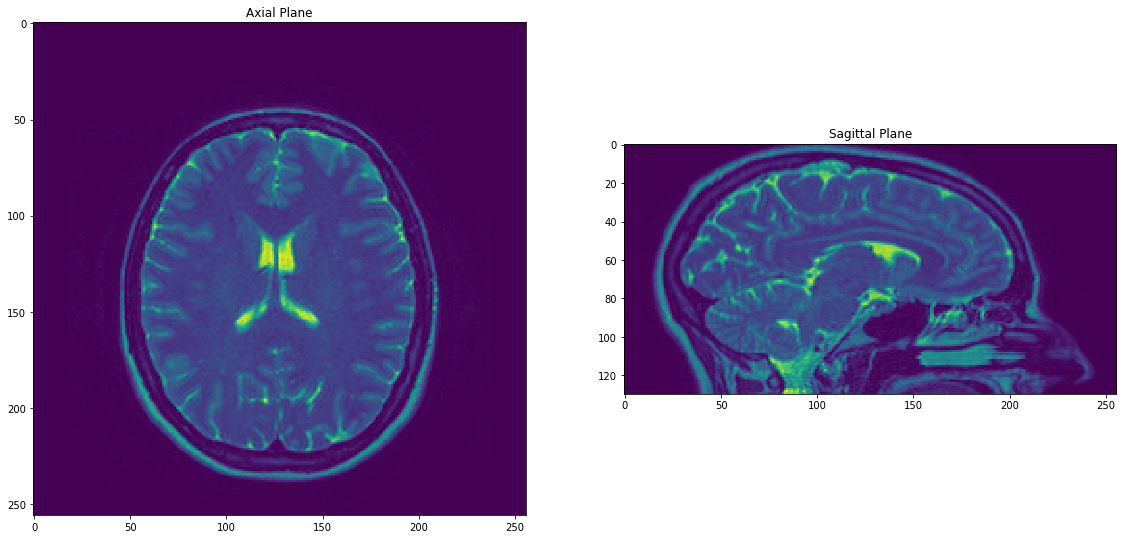

In [17]:
image = nib.load(ixi_root + 'IXI-T2/IXI002-Guys-0828-T2.nii.gz').get_data()
print('Shape of the MRI : {}'.format(image.shape))
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(ndimage.rotate(image[:, :, 75], 90))
plt.title('Axial Plane')

plt.subplot(132)
plt.imshow(ndimage.rotate(image[120, :, :], 90))
plt.title('Sagittal Plane')

### PD Images

Let's view an example of PD image.

Shape of the MRI : (256, 256, 130)


Text(0.5,1,'Sagittal Plane')

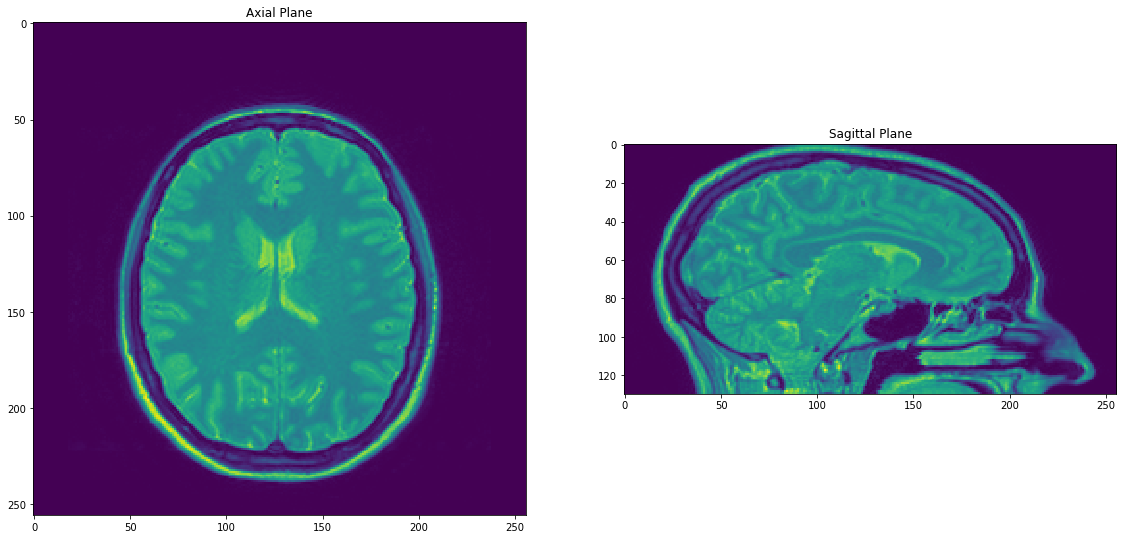

In [19]:
image = nib.load(ixi_root + 'IXI-PD/IXI002-Guys-0828-PD.nii.gz').get_data()
print('Shape of the MRI : {}'.format(image.shape))
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(ndimage.rotate(image[:, :, 75], 90))
plt.title('Axial Plane')

plt.subplot(132)
plt.imshow(ndimage.rotate(image[120, :, :], 90))
plt.title('Sagittal Plane')

### MRA Images

Let's view an example of MRA image.

Shape of the MRI : (512, 512, 100)


Text(0.5,1,'Sagittal Plane')

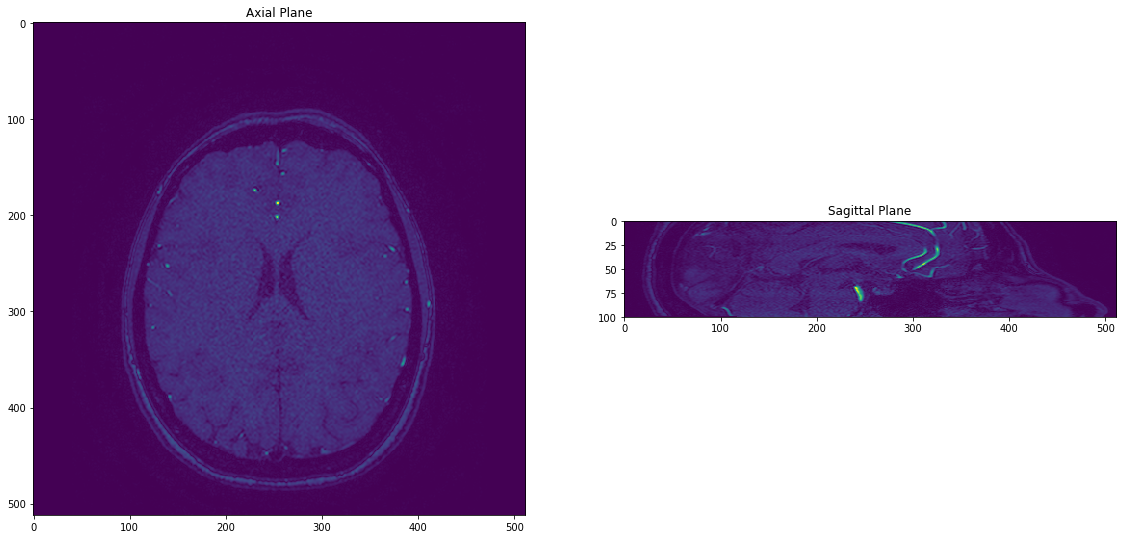

In [20]:
image = nib.load(ixi_root + 'IXI-MRA/IXI002-Guys-0828-MRA.nii.gz').get_data()
print('Shape of the MRI : {}'.format(image.shape))
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(ndimage.rotate(image[:, :, 75], 90))
plt.title('Axial Plane')

plt.subplot(132)
plt.imshow(ndimage.rotate(image[256, :, :], 90))
plt.title('Sagittal Plane')

### DTI Images

Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)
Shape of the MRI : (128, 128, 56)


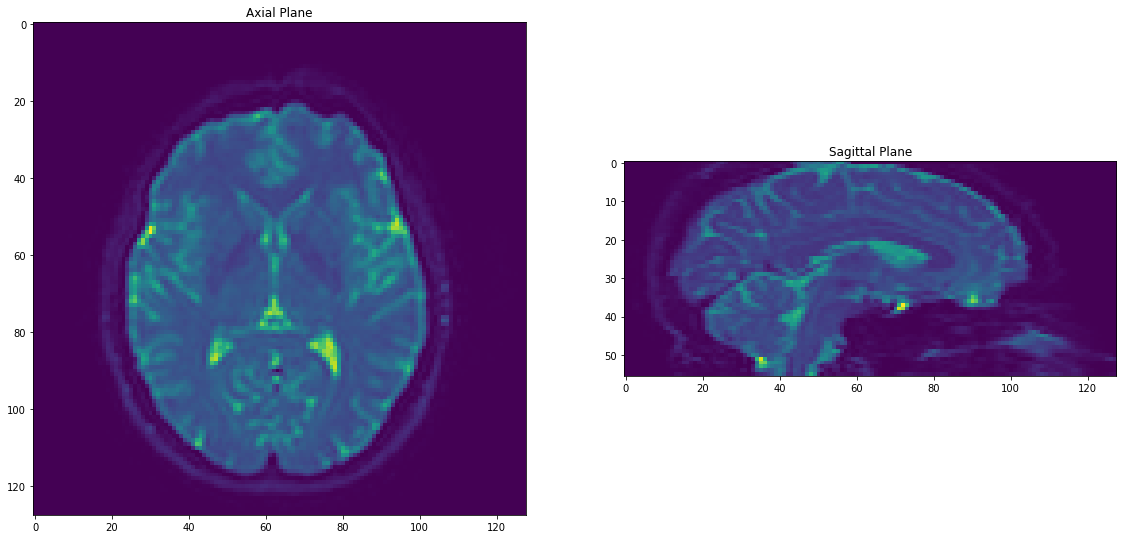

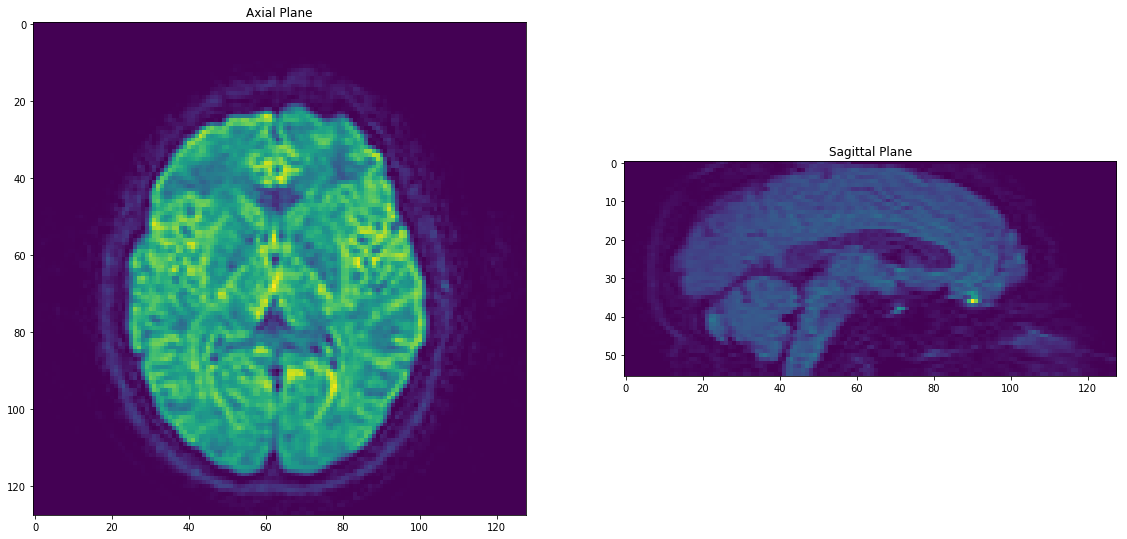

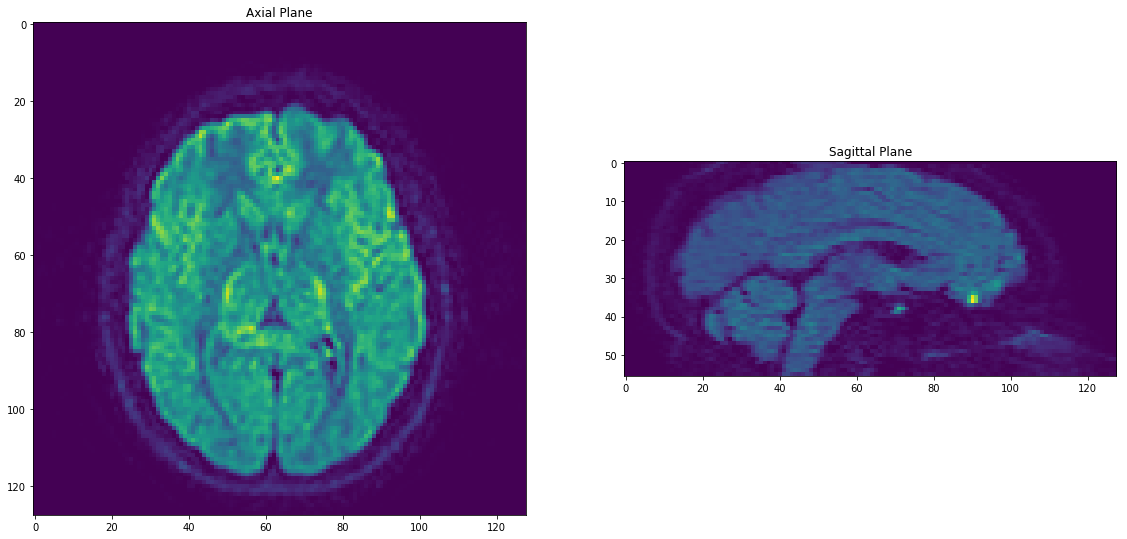

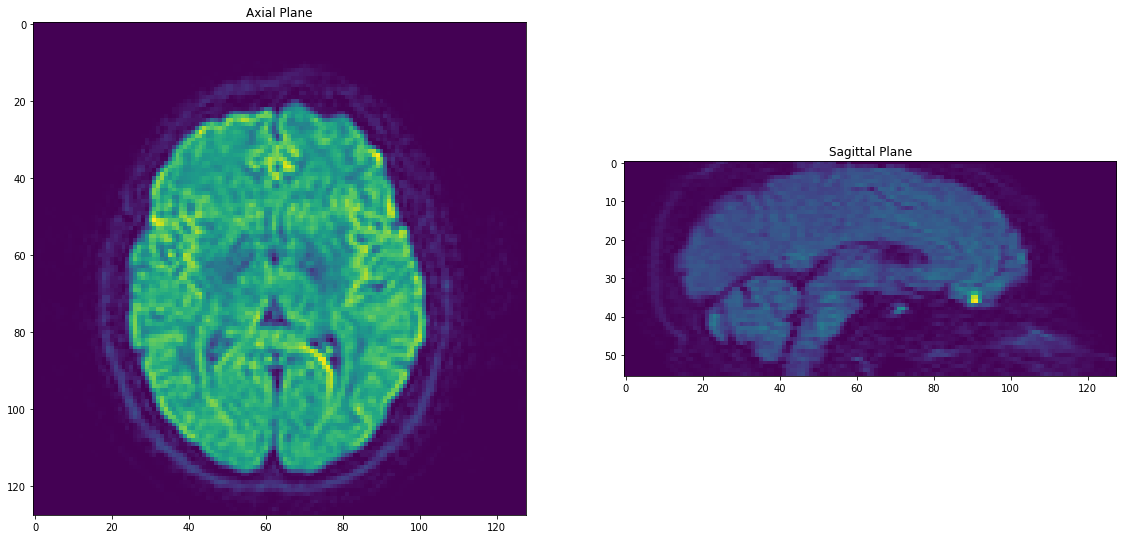

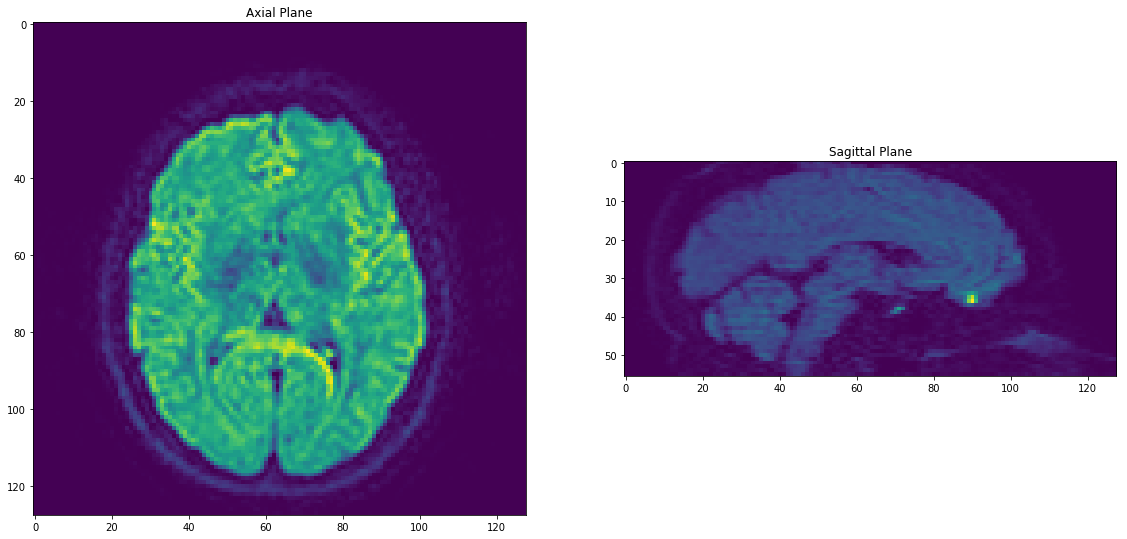

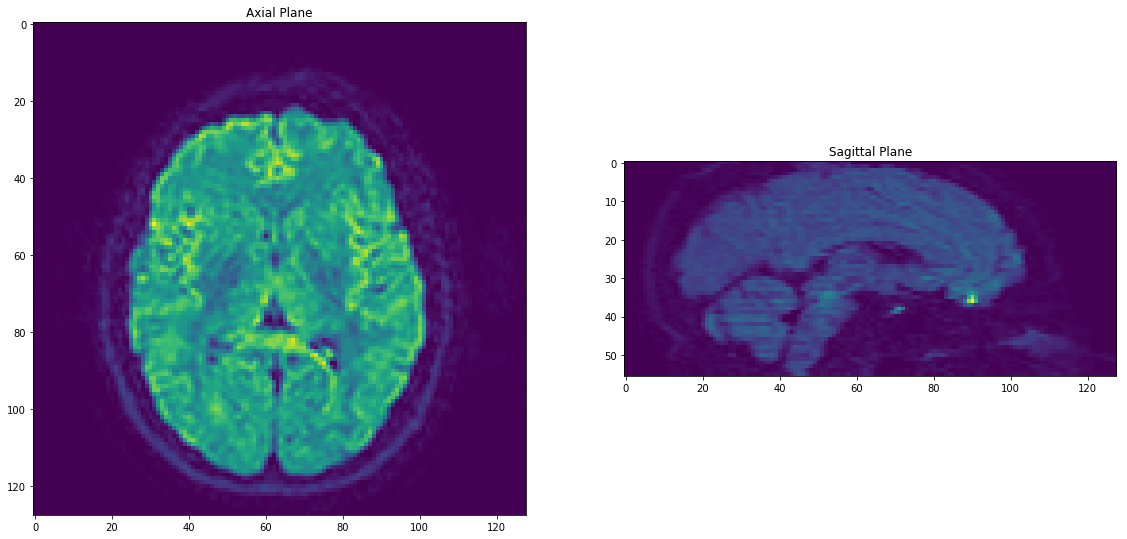

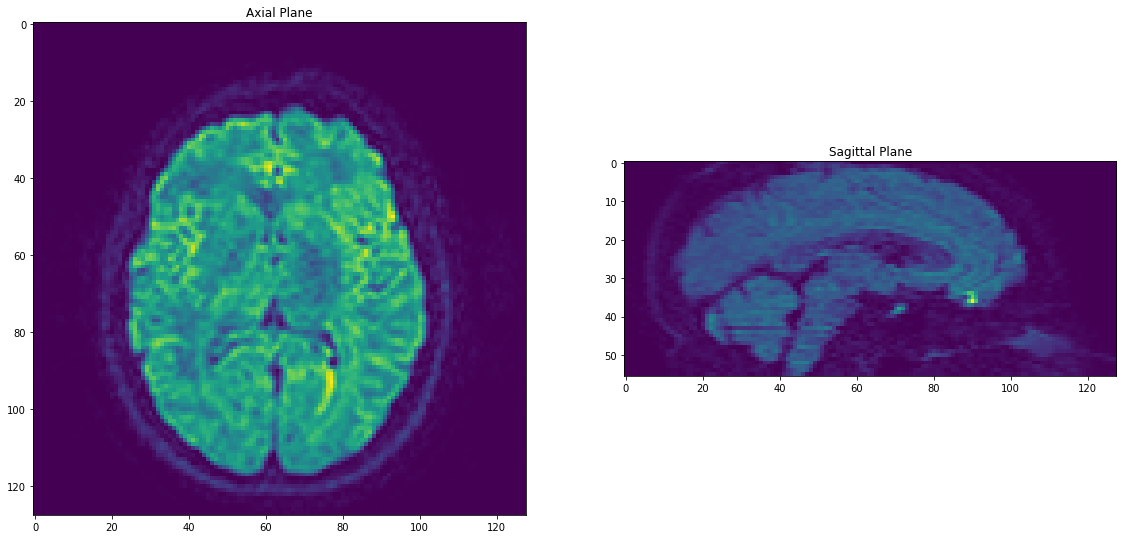

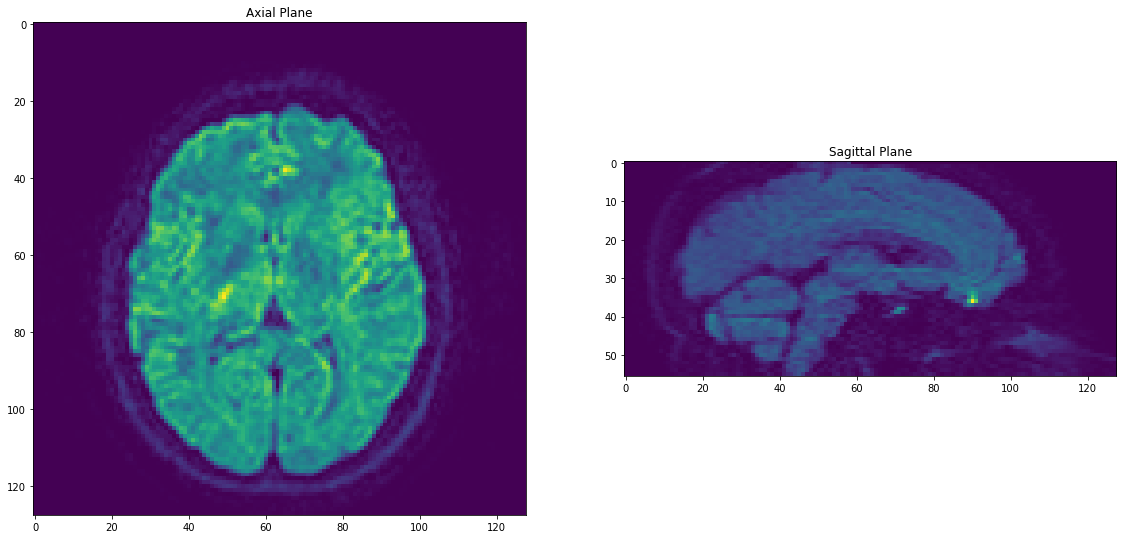

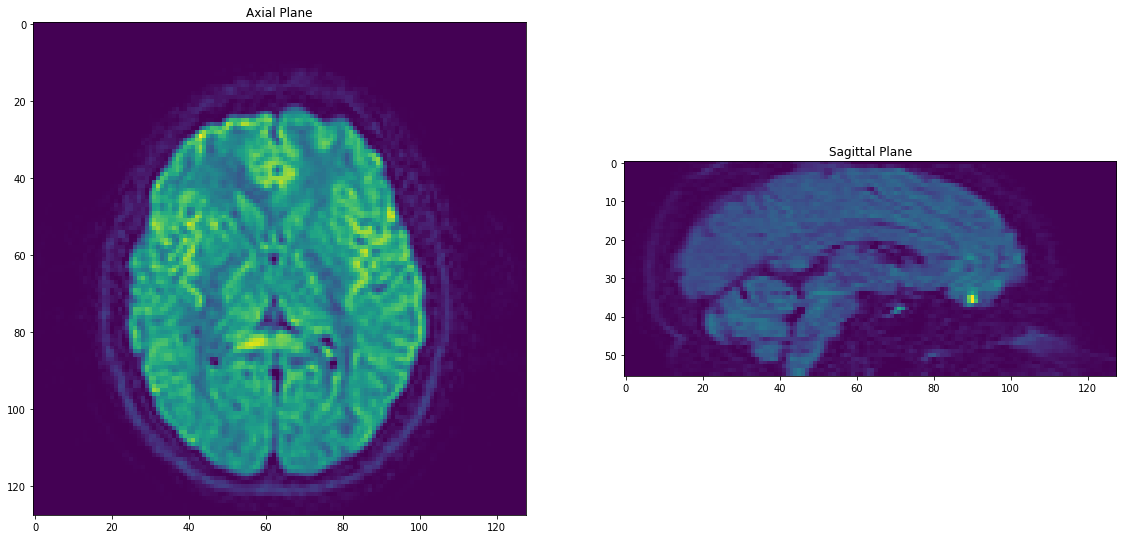

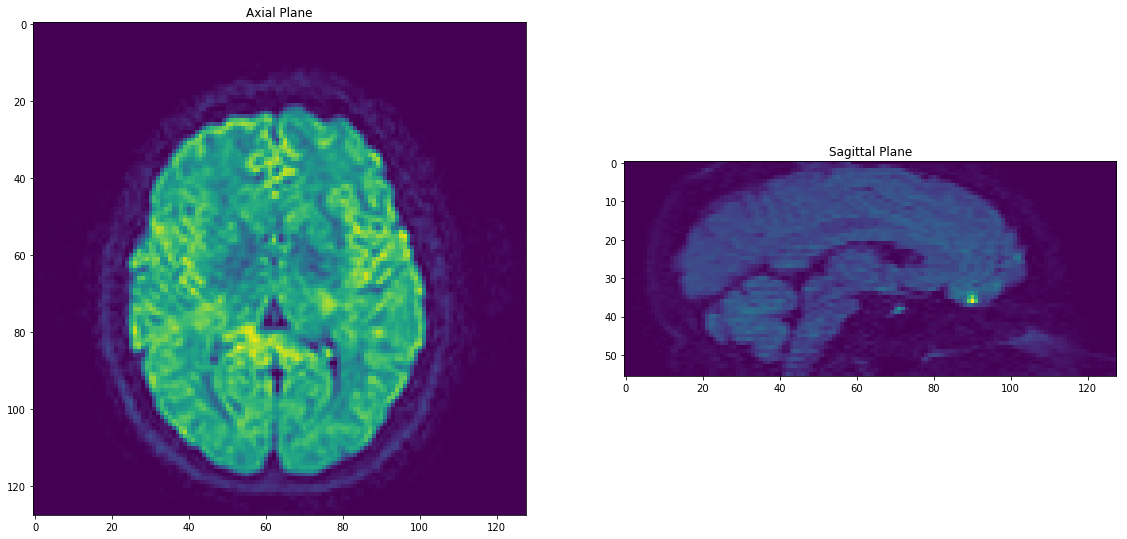

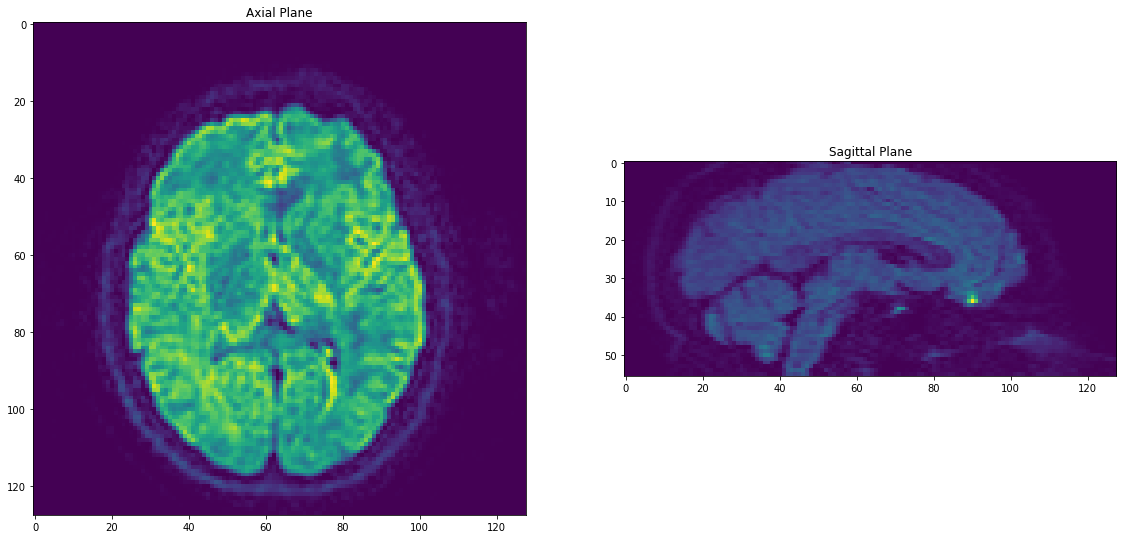

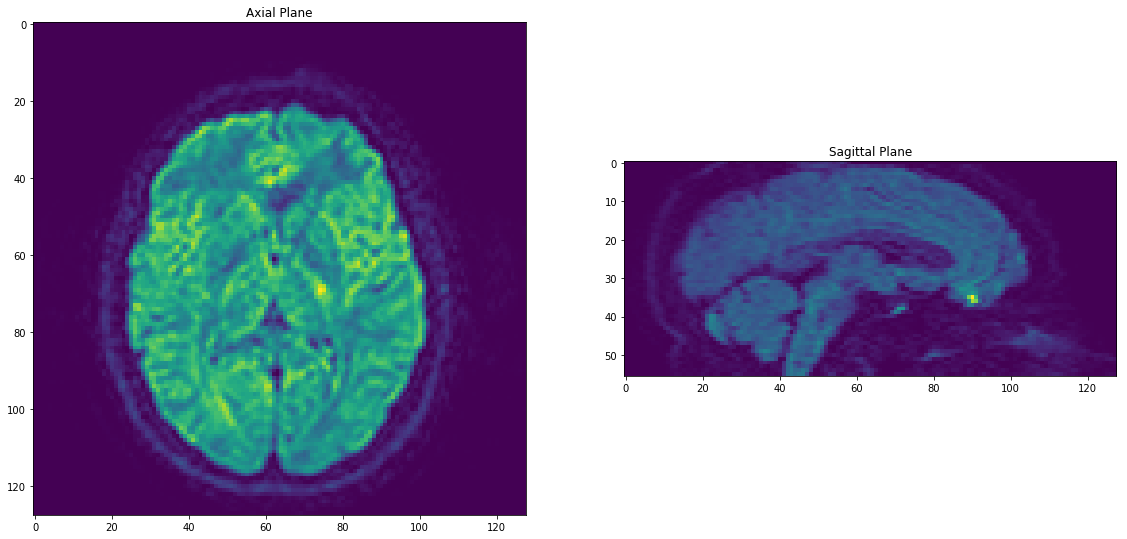

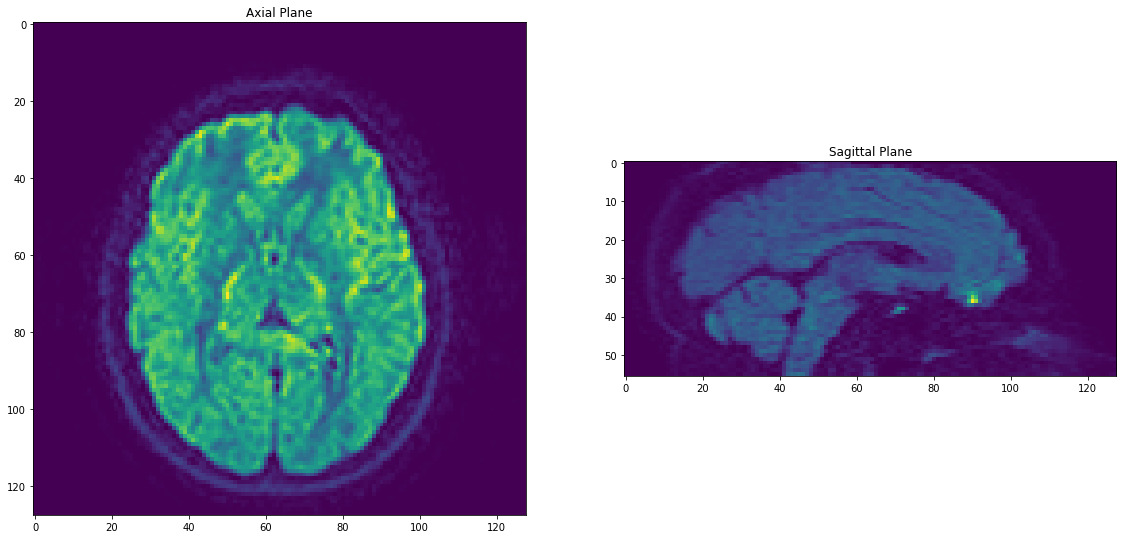

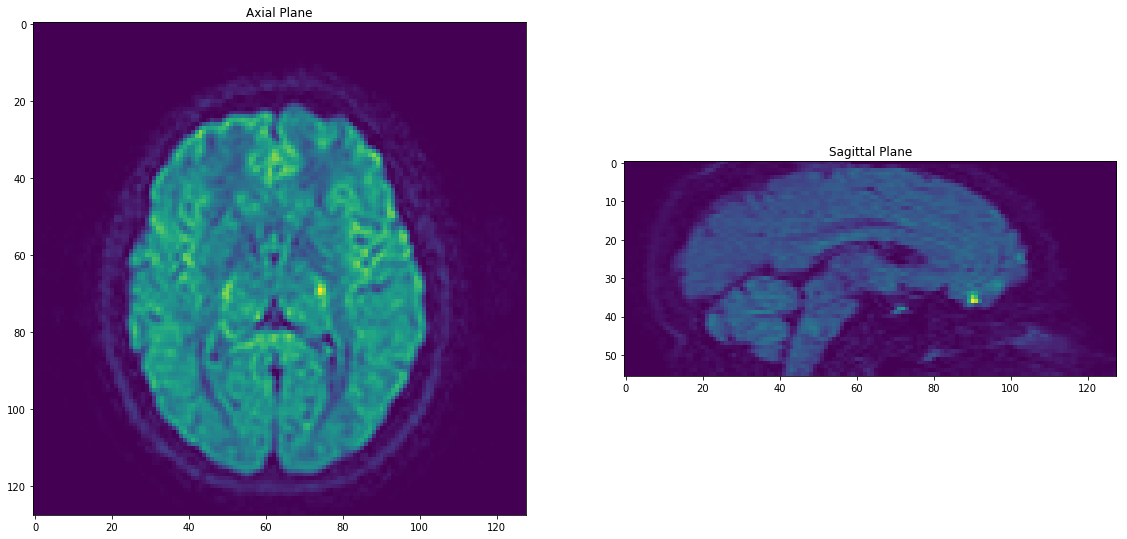

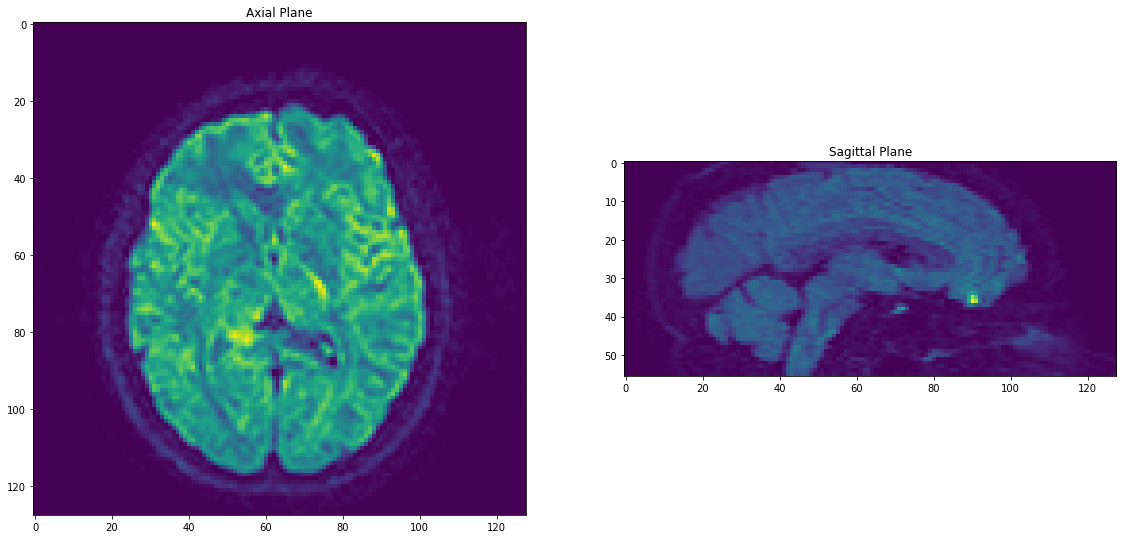

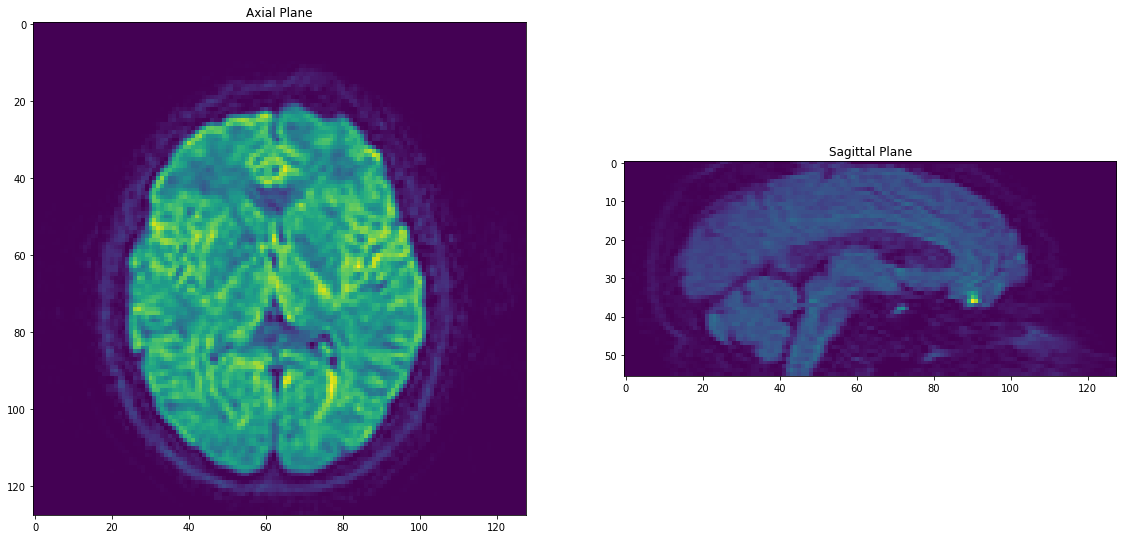

In [21]:
for i in range(16):    
    image = nib.load(ixi_root + f'IXI-DTI/IXI002-Guys-0828-DTI-{i:02d}.nii.gz').get_data()
    print('Shape of the MRI : {}'.format(image.shape))
    plt.figure(figsize=(30, 30))
    plt.subplot(131)
    plt.imshow(ndimage.rotate(image[:, :, 28], 90))
    plt.title('Axial Plane')

    plt.subplot(132)
    plt.imshow(ndimage.rotate(image[64, :, :], 90))
    plt.title('Sagittal Plane')

### Incorrect data visualization

Some of the data from the FCP dataset was discarded. The primary reason for this was:

1. No mprage anonymised data (NewHaven_b, Leipzig, Dallas, Pittsburgh, NewHaven_a hospitals and sub46570 for Newark)
2. Age is very large (one example from AnnArbor_b where age was 9999)
3. The MRI is of a age less than 18 years
4. Data for mprage_anonymized.nii.gz was actually a skull stripped dataset, not a raw one (All subjects for Orangeburg)

Shape of the MRI : (190, 256, 256)


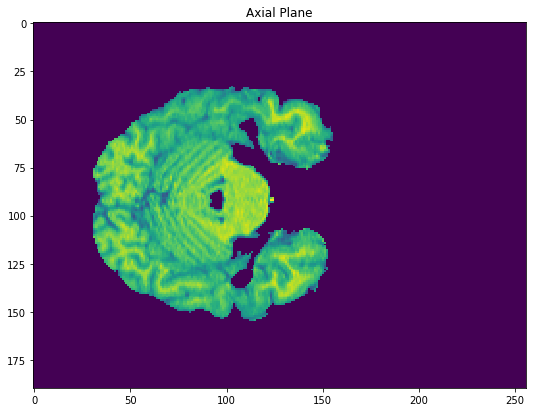

In [34]:
#'NewYork_a/sub01912/anat/mprage_anonymized.nii.gz', 'NewYork_a/sub02503/anat/mprage_anonymized.nii.gz', 'NewYork_a/sub04856/anat/mprage_anonymized.nii.gz', 'NewYork_a/sub15213/anat/mprage_anonymized.nii.gz', 'NewYork_a/sub20732/anat/mprage_anonymized.nii.gz', 
data_paths = ['Orangeburg/sub05191/anat/mprage_skullstripped.nii.gz']
for data_path in data_paths:
    image = nib.load(fcp_root + data_path).get_data()
    print('Shape of the MRI : {}'.format(image.shape))    
    plt.figure(figsize=(30, 30))
    plt.subplot(131)
    plt.imshow(image[:, :, 120])
    plt.title('Axial Plane')


Shape of the MRI : (176, 256, 256)


Text(0.5,1,'Axial Plane')

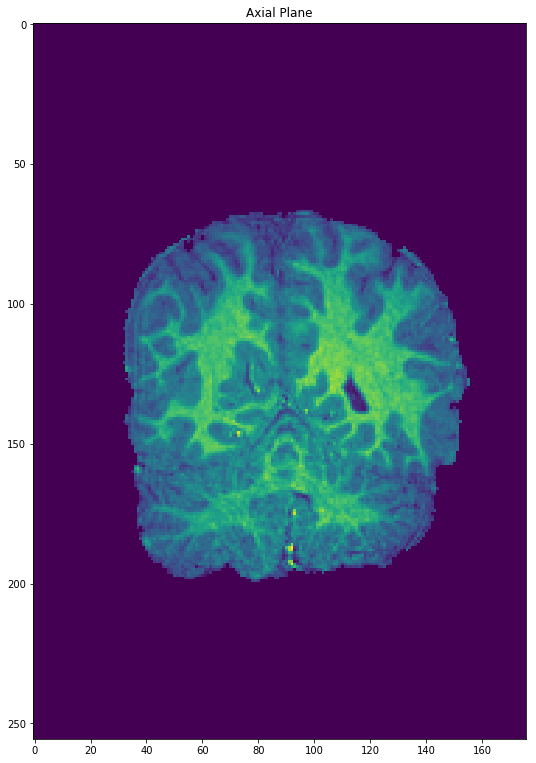

In [20]:
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(ndimage.rotate(image[:, 100, :], 90))
plt.title('Axial Plane')


### ADNI

Shape of the MRI : (136, 192, 160)


Text(0.5, 1.0, 'Sagittal Plane')

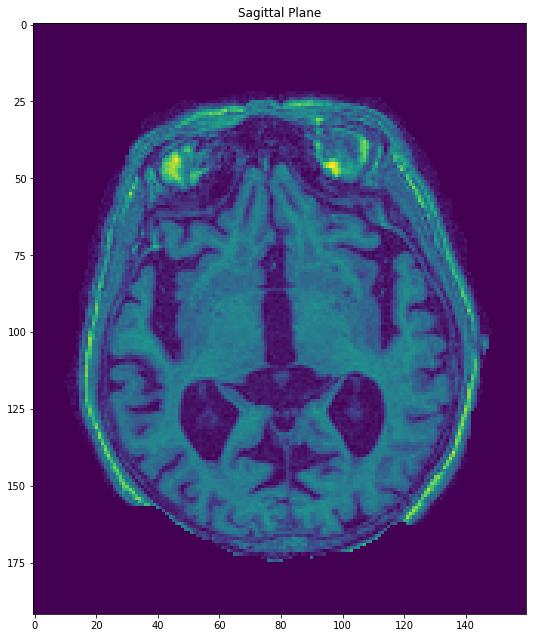

In [13]:
image_orig = nib.load('/data/ADNI/I112538.anat/T1_biascorr.nii.gz').get_data()
image_seg = nib.load('/data/ADNI/I112538.anat/T1_fast_seg.nii.gz').get_data()
image_adni = image_orig * (image_seg > 0)
print('Shape of the MRI : {}'.format(image_adni.shape))
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(image_adni[68, :, :])
plt.title('Sagittal Plane')